<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


# **Deep learning module introduction**

#### **Morning contents/agenda**

1. Description of the module's contents, materials and resources:
  - github repository
  - schedule and assessments
  - teaching team

2. Google Colab introduction

3. Deep learning?

4. Why `PyTorch`?

5. A simple feed-forward network (FNN) with `PyTorch`

#### **Learning outcomes**

1. Overview the module contents and how they will be delivered

2. Understand the assessment process for the module

3. First contact with `PyTorch` and FFNs

<br>


#### **Afternoon contents/agenda**

1. https://playground.tensorflow.org

2. Improving our simpleFFN

#### **Learning outcomes**

1. Understand the effect of different network configurations with tensorflow

2. Break the morning example and raise questions about how `PyTorch` works.


<br/>

---

<br/>


## 1. Tensorflow exercises

In [ ]:
%%html
<iframe src="https://playground.tensorflow.org" width="1200" height="700"></iframe>


Unless otherwise indicated, we work with the following hyper-parameters:
Learning rate =0.03, Batch Size=10, Noise=0, Training Data=70%.

Since there is a total of 500 data points, there are 350 (or 70%) training data and 150 test data.

We examine the behaviour of the networks until about 3500 epochs.

It is important to note that there will be differences between different runs obtained with the same hyperparameters, because the initial values of the neural network parameters (weights and bias terms) are sampled randomly.

The dataset itself may also change if you click the Regenerate Button at the bottom left of the screen.

We work on a classification problem on the Spiral dataset. The yellow dots have a value of -1 and the blue dots have a value of +1.





#### **Question 1:**
Use the sigmoid activation function and no hidden layer. What do you observe? How do you interpret it?

#### **Answer 1:**

With a sigmoid activation function and no hidden layer, we are exactly in the
situation of logistic regression. We know that with a sigmoid function the decision boundary is linear.

---

#### **Question 2:**
Now put just one hidden layer, a sigmoid activation function, and make the number of neurons in the hidden layer equal to 4. Then make it equal to the maximum offered by the application, that is 8. What is the number of trained parameters and what do you observe in each case?


#### **Answer 2:**
With 4 neurons in the hidden layer, we see that after 3500 epochs a slight non-
linearity appears in the Decision Boundary, but on some of the obtained models,
there is no progress at all. The number of parameters (considering that we have
bias terms) to train is 3x4+5=17, which is not enough considering that we have 350 data points in the training set.

With 8 neurons in the hidden layer, and still the sigmoid activation function, we see a slow evolution of the previous non-linearity – but the loss function does not change anymore after a number of iterations - and the Decision Boundary remains simplistic. Sigmoid activations are easier to saturate: once a sigmoid reaches either its left or right plateau, it leads to derivatives that are very close to 0. Also we have only 3x8+9=33 parameters to train, which is still not enough.

#### **Question 3:**
Now do the same as in question 2, but using the ReLU activation function. What do you observe?

#### **Answer 3:**
The changes are faster and more apparent with the ReLU, because we do not have
the saturation effects of the sigmoid function. But the result is still is appointing after 3500 epochs, both with 4 neurons or 8 neurons in the hidden layer. Clearly, more hidden layers are needed in order to increase the number of trained parameters.

---

#### **Question 4:**
Now use two hidden layers each with four neurons and the ReLU activation function. How many trained parameters do you have? What do you observe?

#### **Answer 4:**
There is more change occurring with the ReLU activation function, but the result is still far from satisfactory. The number of trained parameters (with bias terms) is 3x4+5x4+5=37, which is still not enough.

---

#### **Question 5:**
Now try two hidden layers with 8 neurons each and a ReLU activation function. How many trained parameters do you have? What do you observe?

#### **Answer 5:**
We obtain a more satisfactory result, with a significantly decreased training loss (0.019) and test loss (0.050), which tend to be nicely parallel as a function of the number of epochs, meaning that there is no over-fitting in this example. The number of layers, combined with the number of neurons per layer, has led to a much better result, as the number of trained parameters is now 3x8+9x8+9=105.

---

#### **Question 6:**
Now try three hidden layers with 8 neurons each. What happens if you compare sigmoid and ReLU?

#### **Answer 6:**
With three hidden layers of 8 neurons each (the number of trained parameters is now 3x8+9x8+9x8+9=177), the ReLU does much better than the sigmoid (which shows little progress) even after just about 500 epochs. The ReLU test loss is now lower than with two hidden layers at 0.036. It is interesting (by de-activating the “Discrete Output” visualization) to see the maps corresponding to each neuron of the second and third hidden layers for the ReLU, where some very strongly non-linear shapes appear. The fact that ReLU does consistently better than sigmoid explains why ReLU is almost always preferred, except for the last layer of the network.

---

#### **Question 7:**
Now keep the three layers with 8 neurons and change the batch size to 30, and then 1. What happens if you use ReLU?

#### **Answer 7:**
Following this morning’s discussion, if we use a batch size of 1, we do stochastic gradient descent. In this case (result not shown below) the training loss can evolve in a rather chaotic manner: it can significantly increase after reaching a minimum, because of the impact of individual data points on the gradient used and hence on the training loss after the associated iteration. With a batch size of 30, we obtain a test loss of 0.004, avery good score, and a better one than with a batch size of 10. The larger number of data points used in each iteration tends to produce a smoother and regular path
towards a very low test loss.

---


#### **Question 8:**
Now that we have obtained a good model see what happens if you introduce all the 7 input variables

#### **Answer 8:**
Please note that the above dataset is different from those of the previous questions, but this is not an issue as the number of input features is also quite different from that of the previous examples. We see that in less than 200 epochs (instead of 3400 in the previous examples) the network converges to a very good model. By using non-linear functions of the input coordinates, we provide input features that are better suited to the task. The use of seven instead of two input features also drastically increases the number of parameters (to 8x8+9x8+9x8+9= 217) and hence the risk of over-fitting, which may be why the test loss is four times the training loss.

---


#### **Question 9:**
Now assume that the data are affected by noise. Just use the maximum noise value of 50. The application is not very clear about the mechanism by which the noise affects the initial data classes. This does not matter, just assume that, after introducing this noise value of 50, you are now dealing with new binary class values at each point. What do you observe?

#### **Answer 9:**
With noise present, the network still does a good job of producing a fit to the data, even though the difference between test and training loss shows a risk of overfitting.


<br>

---

<br>

## 2. `simpleFFN` exercise

Try to improve the performance of the network we implemented this morning. A few ideas and hints:

- modify the simpleFFN class to add more layers
- play with the sizes of the layers
- don't touch the train, validation, and evaluate functions
- play with the data splits
- copy-paste the code from this morning here, and edit it
- anything else you see fit

#### **Possible solution**:

Let's copy the code from this morning and add modifications.

In [ ]:
!pip install pycm livelossplot
%pylab inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 513 kB/s 
     |████████████████████████████████| 595 kB 46.0 MB/s 
     |████████████████████████████████| 1.6 MB 81.0 MB/s 
Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses
from pycm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchsummary import summary

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  # uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. Useful when inputs do not change size -
    torch.backends.cudnn.enabled   = False

    return True

In [ ]:
import torch

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


In [ ]:
class simpleFFN(nn.Module):
  def __init__(self):
    super(simpleFFN, self).__init__()
    self.hidden_1 = nn.Linear(784, 400, bias=False) ### changing the size of the layers
    self.hidden_2 = nn.Linear(400, 100, bias=False) ### changing the size of the layers
    self.hidden_3 = nn.Linear(100,50)               ### added layer
    self.output = nn.Linear(50, 10, bias=False)    
    self.activation = nn.Sigmoid()
    
  def forward(self, X):
    z1 = self.hidden_1(X)
    a1 = self.activation(z1)
    z2 = self.hidden_2(a1)
    a2 = self.activation(z2)
    z3 = self.hidden_3(z2)    ### modified forward pass to use the new layer
    a3 = self.activation(z3)  ### activate the output of the new layer
    z4 = self.output(a3)      ### and now pass it to the output layer
    a4 = self.activation(z4)
    return a3                 ### something is wrong here! what??
  
x = torch.randn((1, 1, 784))
model = simpleFFN()
y = model(x)
print(y)
print(model)



tensor([[[0.6367, 0.3893, 0.5666, 0.6106, 0.5539, 0.6139, 0.4710, 0.5184,
          0.4047, 0.5344]]], grad_fn=<SigmoidBackward0>)
simpleFFN(
  (hidden_1): Linear(in_features=784, out_features=400, bias=False)
  (hidden_2): Linear(in_features=400, out_features=100, bias=False)
  (hidden_3): Linear(in_features=100, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=10, bias=False)
  (activation): Sigmoid()
)


We download the MNIST dataset:

In [ ]:
mnist_train = MNIST("./", download=True, train=True)
mnist_test = MNIST("./", download=True, train=False)

We split the data in training, validation, and test sets:

In [ ]:
# split the data
shuffler = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42).split(mnist_train.train_data, mnist_train.train_labels) 
indices = [(train_idx, validation_idx) for train_idx, validation_idx in shuffler][0]

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


We standardise the data. 

\[***NOTE***: 
*As we will see in the coming weeks, even though this step is not strictly necessary, it does result in better performance because we are assuming that our data has some underlying Gaussian distribution (the errors rather, as we will see next Monday). In general, it is good practice to standardise our data as it improves convergence speed and results in better generalisation (we will (re)define this concept on Thursday).*\]

In [ ]:
def apply_standardization(X): # define an standardisation function
  X /= 255.
  X -= 0.1307
  X /= 0.3081
  return X

# standardise the data
X_train, y_train = apply_standardization(mnist_train.train_data[indices[0]].float()), mnist_train.train_labels[indices[0]]
X_val, y_val = apply_standardization(mnist_train.train_data[indices[1]].float()), mnist_train.train_labels[indices[1]]
X_test, y_test =  apply_standardization(mnist_test.test_data.float()), mnist_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


We create TensorDatasets (more on this on the next two days):

In [ ]:
# create the TensorDatasets containing mnist_train, mnist_validate, and mnist_test
mnist_train = TensorDataset(X_train, y_train.long())
mnist_validate = TensorDataset(X_val, y_val.long())
mnist_test = TensorDataset(X_test, y_test.long())

And we plot one of the elements of the training set (to check we loaded the data correctly)

tensor(0.0001) tensor(1.0003)


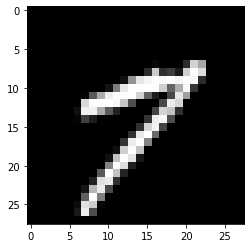

In [ ]:
plt.imshow(X_train[10], cmap = 'gray')
print(X_train.mean(), X_train.std())

Now we are going to define functions to train and validate our network:

In [ ]:
def train(model, optimizer, criterion, data_loader):
    model.train()                         # the model is in the training mode so the parameters(weights)to be optimised will be updated
    train_loss, train_accuracy = 0, 0     # initialise loss and accuracy to 0 for training
    for X, y in data_loader:              # iterate over the mini-batches defined in the data loader
        X, y = X.to(device), y.to(device) # send data to the device (GPU in our case)
        optimizer.zero_grad()             # resetting optimiser info
        a2 = model(X.view(-1, 28*28))     # forward pass
        loss = criterion(a2, y)           # compute loss
        loss.backward()                   # backpropagation to calculate the gradients
        train_loss += loss*X.size(0)      # # add it up for different mini-batches and undo loss normalisation
        y_pred = F.log_softmax(a2, dim=1).max(1)[1]  # get predictions
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0) # compute accuracy
        optimizer.step()                  # perform a step of gradient descent
        
    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset)  # here we can average over the whole dataset


def validate(model, criterion, data_loader):      # does not need optimiser
    model.eval()                                  # model is set to evaluation mode so no dropout or any other funny stuff here
    validation_loss, validation_accuracy = 0., 0. # initialise loss and accuracy to 0 for training
    for X, y in data_loader:                      # iterate over the mini-batches defined in the data loader
        with torch.no_grad():                     # deactivates autograd engine
            X, y = X.to(device), y.to(device)     # send data to the device (GPU in our case)
            a2 = model(X.view(-1, 28*28))         # forward pass
            loss = criterion(a2, y)               # evaluate loss
            validation_loss += loss*X.size(0)     # add it up for different mini-batches and undo loss normalisation
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]  # get predictions
            validation_accuracy += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())*X.size(0) # compute accuracy
            
    return validation_loss/len(data_loader.dataset), validation_accuracy/len(data_loader.dataset)  # here we can average over the whole dataset

Select the hyperparameters of our network:

In [ ]:
seed = 42
lr = 1e-2
momentum = 0.9
batch_size = 64
test_batch_size = 1000
n_epochs = 30

and set a few more parameters:

In [ ]:
set_seed(seed)
model = simpleFFN().to(device)                                              # instantiate model and send it to the GPU
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)   # instantiate the optimizer
criterion = nn.CrossEntropyLoss() 

We now create the DataLoaders (again, we will cover them on Tuesday and Wednesday):

In [ ]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0) ## num_workers=0 means that the main process will retrieve the data.
validation_loader = DataLoader(mnist_validate, batch_size=test_batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(mnist_test, batch_size=test_batch_size, shuffle=False, num_workers=0)

And now we are ready to train our network and display the evolution in real time with livelossplot (don't worry about the details of how livelossplot works yet):

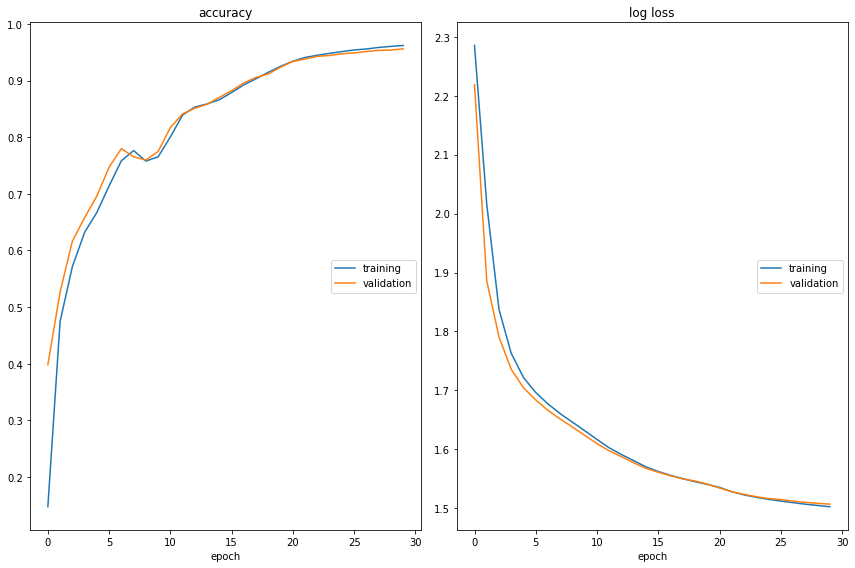

accuracy
	training         	 (min:    0.147, max:    0.962, cur:    0.962)
	validation       	 (min:    0.398, max:    0.956, cur:    0.956)
log loss
	training         	 (min:    1.503, max:    2.285, cur:    1.503)
	validation       	 (min:    1.507, max:    2.219, cur:    1.507)
1.5070912837982178


In [ ]:
set_seed(seed)
liveloss = PlotLosses()    # plots evolution of loss and accuracy
for epoch in range(30):
    logs = {}
    train_loss, train_accuracy = train(model, optimizer, criterion, train_loader)

    logs['' + 'log loss'] = train_loss.item()
    logs['' + 'accuracy'] = train_accuracy.item()
    
    validation_loss, validation_accuracy = validate(model, criterion, validation_loader)
    logs['val_' + 'log loss'] = validation_loss.item()
    logs['val_' + 'accuracy'] = validation_accuracy.item()
    
    liveloss.update(logs)
    liveloss.draw()
    print(validation_loss.item())

**Now the model seems to be doing better than before. Why?**

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    ys, y_preds = [], []
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device) # data and labels to device
            a2 = model(X.view(-1, 28*28))     # forward pass and reshape tensor and get it ready to the fully connected layer
            y_pred = F.log_softmax(a2, dim=1).max(1)[1] # calculate prediction
            ys.append(y.cpu().numpy())        # save predictions
            y_preds.append(y_pred.cpu().numpy()) # save predictions
    
    return np.concatenate(y_preds, 0),  np.concatenate(ys, 0) ## concatenate the labels of each batch into a single list

y_pred, y_gt = evaluate(model, validation_loader)
print(y_pred, y_gt)

[1 9 3 ... 8 0 4] [1 9 3 ... 5 0 4]


Now we want to calculate the confusion matrix of the results we just generated, and plot it:

In [ ]:
cm = ConfusionMatrix(actual_vector=y_gt, predict_vector=y_pred) ## Create the confusion matrix from Data. ConfusionMatrix is a class derived from the pycm library
print(cm)

Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         576       1         2         0         0         5         3         2         2         1         

1         0         661       5         4         0         0         0         0         3         1         

2         2         4         568       6         3         0         6         5         2         0         

3         1         0         5         582       0         9         0         4         9         3         

4         0         2         1         0         554       0         9         2         2         14        

5         2         1         0         6         2         518       3         1         4         5         

6         8         1         2         0         8         8         564       0         1         0         

7         1         3         4         2         0         1         0         606       0       

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:208: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


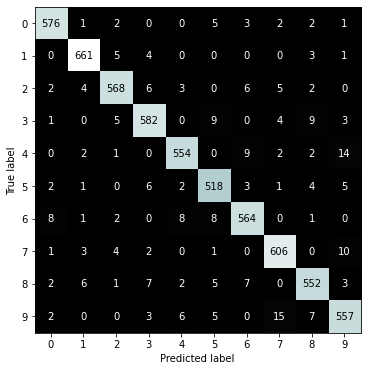

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_gt, y_pred, ax=ax, colorbar=False, cmap='bone')
plt.show()